### Import pre-trained model

In [1]:
import torchvision.models as models
import torch

# View deep learning architectures implemented in this library
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [2]:
model = models.alexnet(pretrained=True) # Downloads the weights for the network first
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### View the image

In [3]:
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

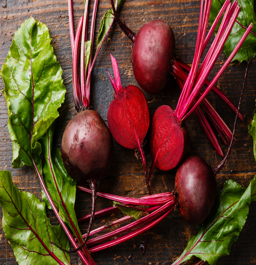

In [46]:
img = Image.open('dataset/archive/test/beetroot/Image_1.jpg')
s = 255
img.resize((256,265))

### Transforming image to tensor

In [47]:
from torchvision import transforms 

transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [48]:
transformed_img = transform(img)
transformed_img.shape

torch.Size([3, 224, 224])

### Preparing batch for the network

In [49]:
batch_t = torch.unsqueeze(transformed_img, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

In [50]:
# The current output and number of classes are 1000. 
# This needs to be changed to the number of accurate classes in this dataset.

model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Determine the number of classes

In [51]:
from utils_helper_functions import convert_path_to_txt

convert_path_to_txt('dataset/archive/test')

with open('labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]
print(f'Number of classes: {len(classes)}')
classes


Number of classes: 36


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

### Reinitialise the final layer of the model

In [52]:
in_features = 4096
out_features = len(classes)

model.classifier[6] = torch.nn.Linear(in_features=in_features, out_features=out_features)

In [53]:
# Run the batch into the network
output = model(batch_t)
output.shape

torch.Size([1, 36])

### Take the first 10 instances that classifies as the most likely class
Here it shows that the AlexNet model has classed the photo of the beetroot as 'potato', with a likelihood of 9%.

In [55]:
_, indices = torch.sort(output, descending=True)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
len(indices[0])
[(classes[idx], percentage[idx].item()) for idx in indices[0][:10]]

[('potato', 9.318443298339844),
 ('orange', 6.9585747718811035),
 ('cucumber', 6.108283996582031),
 ('lemon', 5.301821708679199),
 ('tomato', 4.334592342376709),
 ('garlic', 4.1246724128723145),
 ('onion', 3.977341651916504),
 ('pear', 3.521320343017578),
 ('pomegranate', 3.515886068344116),
 ('beetroot', 3.2802839279174805)]